In [278]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


In [279]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predict drugaddition/drugAddiction.csv', encoding='latin1')

In [306]:
df.info()
print("\n\nDescription")
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             211 non-null    object
 1   Gender                          211 non-null    object
 2   Education                       211 non-null    object
 3   Enjoyable with-                 211 non-null    object
 4   Live with                       211 non-null    object
 5   Conflict with law               211 non-null    object
 6   Motive about drug               211 non-null    object
 7   Spend most time                 211 non-null    object
 8   Failure in life                 211 non-null    object
 9   Mental/emotional problem        211 non-null    object
 10  Suicidal thoughts               211 non-null    object
 11  Family relationship             211 non-null    object
 12  Financials of family            211 non-null    ob

,count,unique,top,freq
Age,211,4,between 22 to 35 years,122
Gender,211,2,Male,142
Education,211,5,Undergraduate,132
Enjoyable with-,211,3,I have no idea,122
Live with,211,2,With Family/Relatives,130
Conflict with law,211,2,No,159
Motive about drug,211,7,Should avoid,83
Spend most time,211,3,Friends,127
Failure in life,211,2,Yes,109
Mental/emotional problem,211,17,Depression/ inferiority/Guilt,44


In [281]:
df.head()

,Age,Gender,Education,Enjoyable with-,Live with,Conflict with law,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,...,friends houses at night,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Frequency of drug usage
0,between 22 to 35 years,Male,Undergraduate,One drug,Hostel/Hall,No,Disease,Alone,Yes,Depression/ inferiority/Guilt,...,"No, I don't",No,No,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"Yes, It's possible",Once/twice a week
1,between 22 to 35 years,Male,H.S.C / A levels,I have no idea,With Family/Relatives,Yes,Should avoid,Friends,Yes,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,No,No,No,"Yes, every day.",Yes,"Yes, often they do",i don't know/ confused,"Yes, It's possible",Occasionally
2,15 to 22 years,Male,H.S.C / A levels,One drug,With Family/Relatives,Yes,Disease,Friends,Yes,Depression/ inferiority/Guilt,...,Sometimes,No,Yes,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"No, It's not possible",Once/twice a week
3,between 22 to 35 years,Male,Undergraduate,One drug,With Family/Relatives,No,Social trend,Friends,Yes,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,Yes,No,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"Yes, It's possible",Once/twice a week
4,between 22 to 35 years,Male,Undergraduate,I have no idea,With Family/Relatives,No,"Social trend, Should avoid",Alone,No,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,Yes,No,No,"Yes, every day.",No,"No, they don't","no, i'll not","Yes, It's possible",Never/ Not applicable


Section 02:- EDA

In [282]:
df[df.duplicated()].count()

Age                               6
Gender                            6
Education                         6
Enjoyable with-                   6
Live with                         6
Conflict with law                 6
Motive about drug                 6
Spend most time                   6
Failure in life                   6
Mental/emotional problem          6
Suicidal thoughts                 6
Family relationship               6
Financials of family              6
Addicted person in family         6
no. of friends                    6
Withdrawal symptoms               6
friends houses at night          6
Satisfied with workplace          6
Case in court                     6
Living with drug user             6
Smoking                           6
Ever taken drug                   6
Friends influence                 6
If chance given to taste drugs    6
Easy to control use of drug       6
Frequency of drug usage           6
dtype: int64

Encoding

In [283]:
dfclassification=df.copy()
dfclassification['Suicidal thoughts']=dfclassification[['Suicidal thoughts']].apply(lambda x:x.map({'Yes':1,'No':0}))
dfclassification['Gender']=dfclassification[['Gender']].apply(lambda x:x.map({'Male':1,'Female':0}))
dfclassification['Failure in life']=dfclassification[['Failure in life']].apply(lambda x:x.map({'Yes':1,'No':0}))

In [284]:
mylist = list(dfclassification.select_dtypes(include=['object']).columns)
dummy1=pd.get_dummies(dfclassification[mylist],drop_first=True)
dfclassificationFinal = pd.concat([dummy1,dfclassification['Suicidal thoughts'],dfclassification['Gender'],dfclassification['Failure in life']], axis=1)
from sklearn import preprocessing
X = dfclassificationFinal.drop('Suicidal thoughts',axis=1).values
y = dfclassificationFinal['Suicidal thoughts'].values

In [285]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.5,random_state=2,stratify=y)

train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
#Splitting the Data Equally in to X_train and X_test

>Train: 0=71, 1=34, Test: 0=72, 1=34


**Model 1**



Support Vector Machine (SVM)

In [286]:
model=SVC()
model.fit(X_train,y_train)
print(f' Training Accuracy is:- {model.score(X_train,y_train)}')
f'Test Accuracy is:- {model.score(X_test,y_test)}'

 Training Accuracy is:- 0.8761904761904762


'Test Accuracy is:- 0.6981132075471698'

**Model 2**

KNN without Hyper parameter tuning


 Best Test accuracy is:-  0.7358490566037735


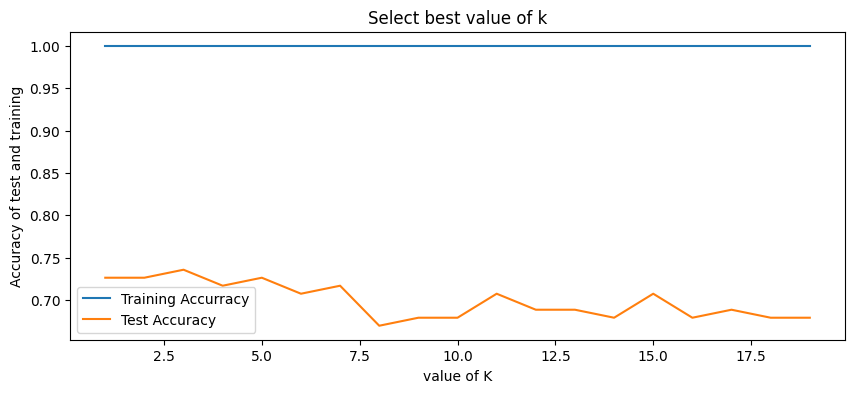

In [287]:
k = range(1,20)
trainingAccuracy = []
testAccuracy=[]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=15,p=1,weights='distance')
    knn.fit(X_train,y_train)
    trainingacc = knn.score(X_train,y_train)
    trainingAccuracy.append(trainingacc)
    testAccuracy.append(knn.score(X_test,y_test))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
plt.xlabel("value of K")
plt.ylabel("Accuracy of test and training")
plt.title("Select best value of k")
plt.plot(k,trainingAccuracy)
plt.plot(k,testAccuracy)
  #axes[0].legend(['loss','val_loss'])
axes.legend(["Training Accurracy","Test Accuracy"])
print("\n Best Test accuracy is:- ",max(testAccuracy))

KNN With Hyper parameter tuning

In [288]:
k_range = list(range(1,50))
weight_options = ["uniform", "distance"]
pe=[1,2]

param_grid = dict(n_neighbors = k_range, weights = weight_options,p=pe)
knn = KNeighborsClassifier()
knngrid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy',n_jobs=15)
knngrid.fit(X_train,y_train)

print ("Best score on 10 folds split Data on Train split is :- ",knngrid.best_score_)
print ("\n Best Param:- ",knngrid.best_params_)
print ("\n Best KNN Metric:- ", knngrid.best_estimator_)

print(f' \n Training Accuracy {knngrid.score(X_train,y_train)}')
f'Test Accuracy {knngrid.score(X_test,y_test)}'

Best score on 10 folds split Data on Train split is :-  0.7990909090909091

 Best Param:-  {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

 Best KNN Metric:-  KNeighborsClassifier(n_neighbors=8, p=1, weights='distance')
 
 Training Accuracy 1.0


'Test Accuracy 0.6698113207547169'

Text(95.72222222222221, 0.5, 'Truth')

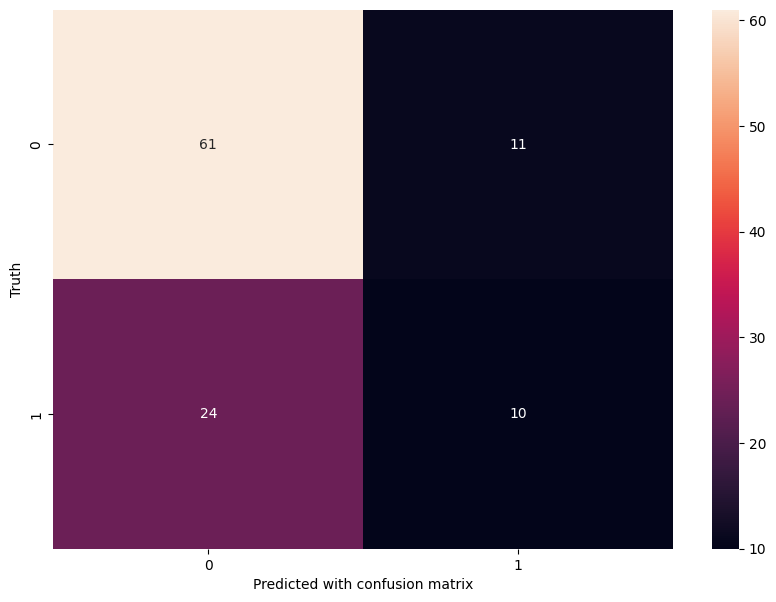

In [289]:
y_predicted = knngrid.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted with confusion matrix')
plt.ylabel('Truth')

**Model 3**

Logistic Regression

In [290]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

log_model.fit(X_train, y_train)
print(f' Training Accuracy {log_model.score(X_train,y_train)}')
f'Test Accuracy {log_model.score(X_test,y_test)}'

 Training Accuracy 0.8476190476190476


'Test Accuracy 0.7735849056603774'

**Model 4**

 Neural Network

In [291]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
        }
       ]
clf = GridSearchCV(MLPClassifier(), param_grid, cv=folds,
                           scoring='accuracy',n_jobs=-1,verbose = 1,
)
clf.fit(X_train, y_train)
print(f' Training Accuracy {clf.score(X_train,y_train)}')
f'Test Accuracy {clf.score(X_test,y_test)}'

Fitting 5 folds for each of 12 candidates, totalling 60 fits
 Training Accuracy 0.7714285714285715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


'Test Accuracy 0.6698113207547169'

In [292]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results[cv_results.rank_test_score<5]
#print the optimum value of hyperparameters
print('Best hyperparameters: ', clf.best_params_)

Best hyperparameters:  {'activation': 'identity', 'solver': 'sgd'}


Model 5

suicidal thoughts are more in Male compared to Female.

<Axes: xlabel='Suicidal thoughts', ylabel='count'>

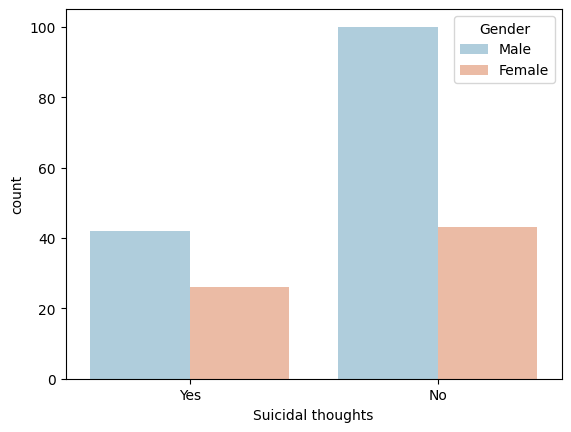

In [293]:
sns.countplot(x='Suicidal thoughts',hue='Gender',data=df,palette='RdBu_r')

Regular usage of Drug is more common in undergraduates than compared to others

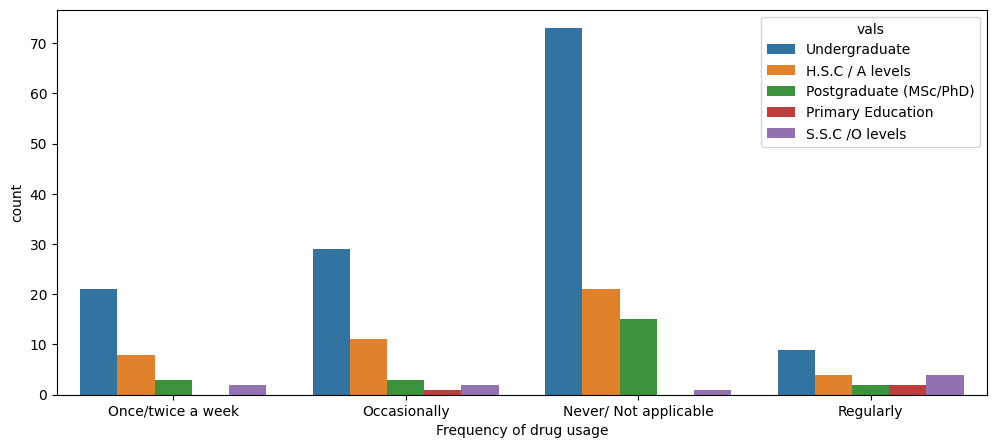

In [294]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Education'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

we see Regularly usage of drug is more in Male compared to Female.

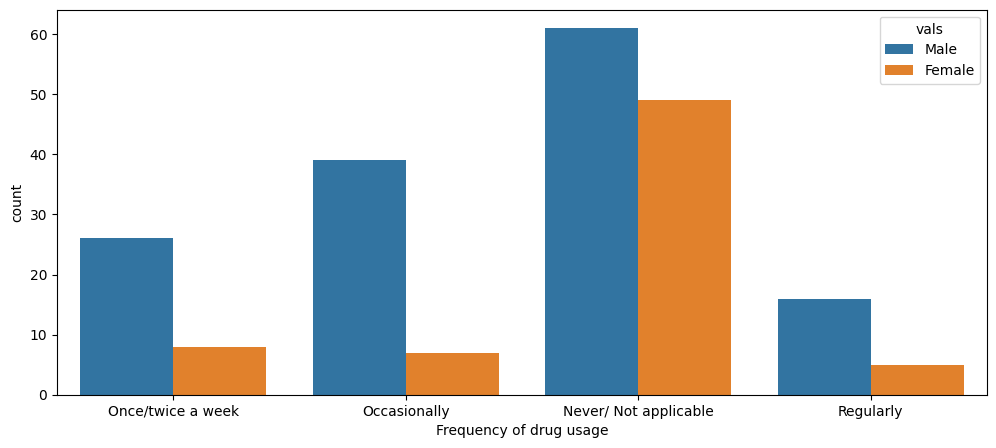

In [295]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Gender'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

Regularly usage of drug is more between age group of 22 to 35

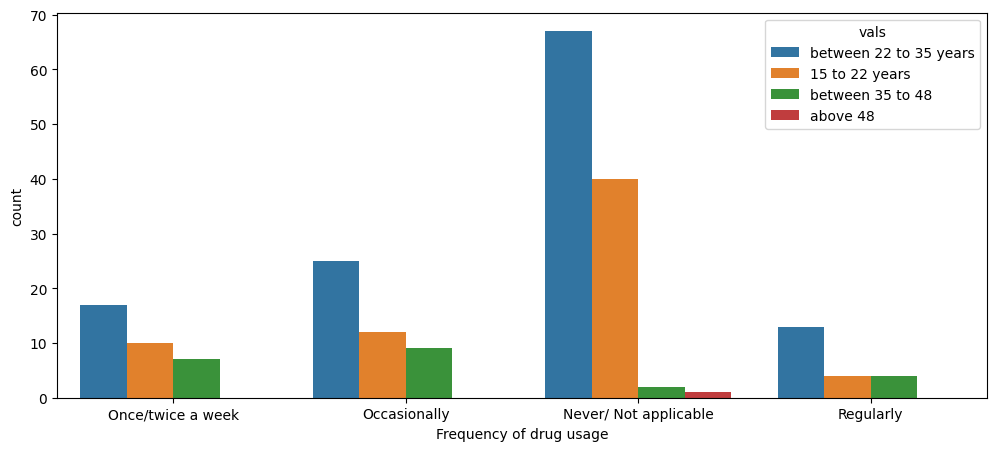

In [296]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Age'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

Regularly usage of drug is more in people who stay with their Family

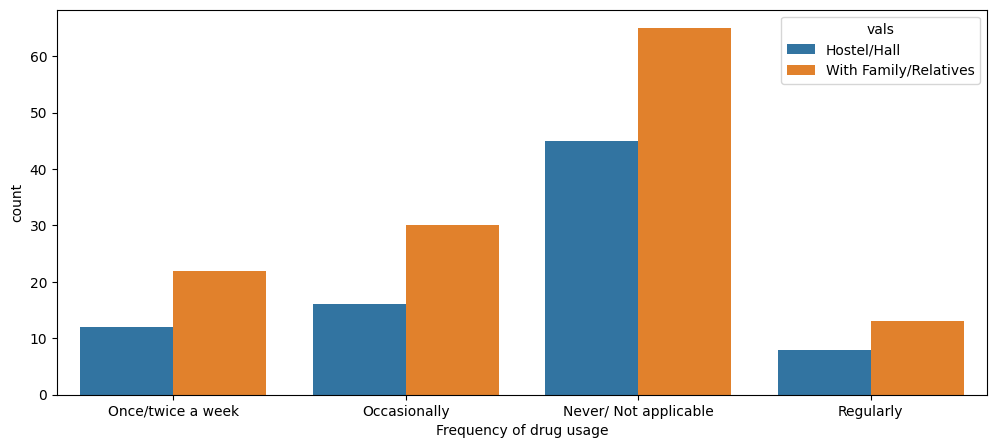

In [297]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Live with'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

Suicidal Ideation is less in Male who are Regularly users of drug

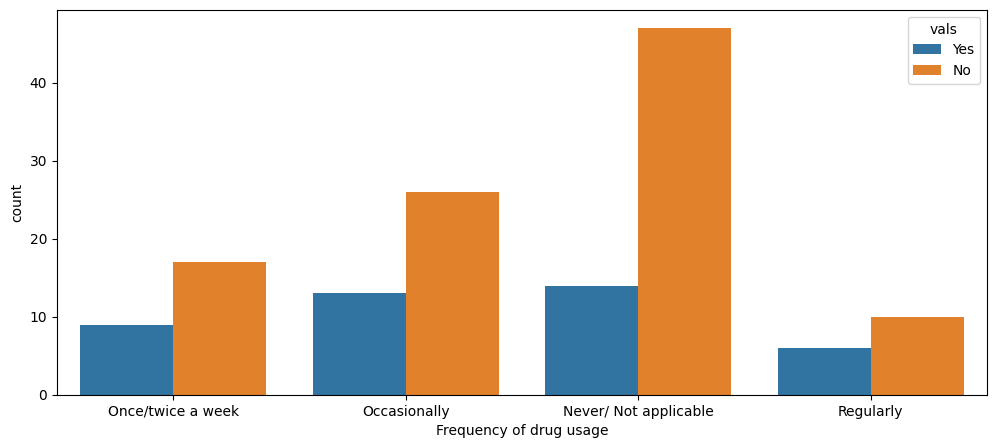

In [298]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Suicidal thoughts'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])

Suicidal Ideation is less in Female who are Regularly users of drug

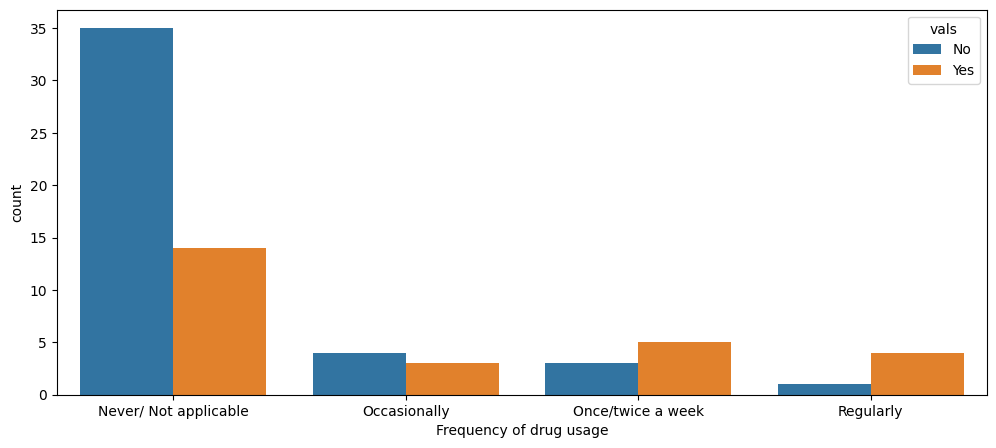

In [299]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Suicidal thoughts'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])

we see Suicidal Ideation is MORE if the person is Under graduate

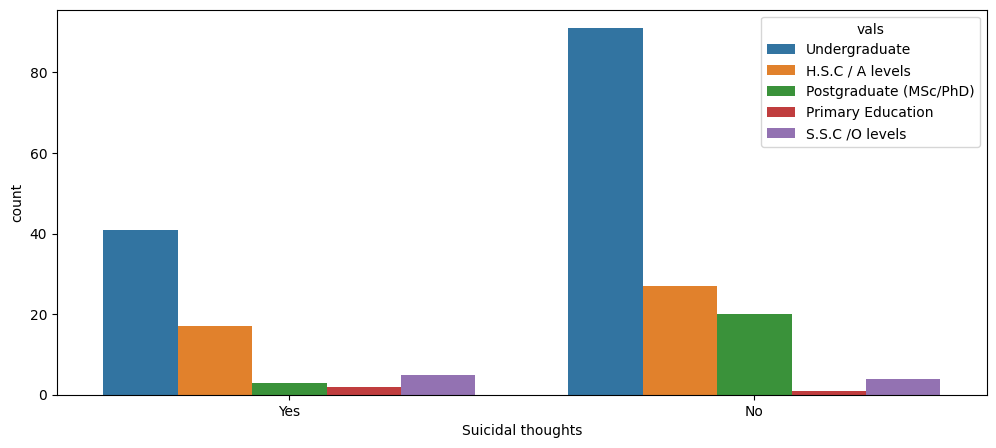

In [300]:
df01 = df.melt( id_vars=['Suicidal thoughts'],value_vars=['Education'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Suicidal thoughts", hue='vals', data=df01)

Regular usage is more in people who are regular/everyday smokers, Intresting fact from the plot is if the person dont smoke he/she may not get in to the Regular usage of drug

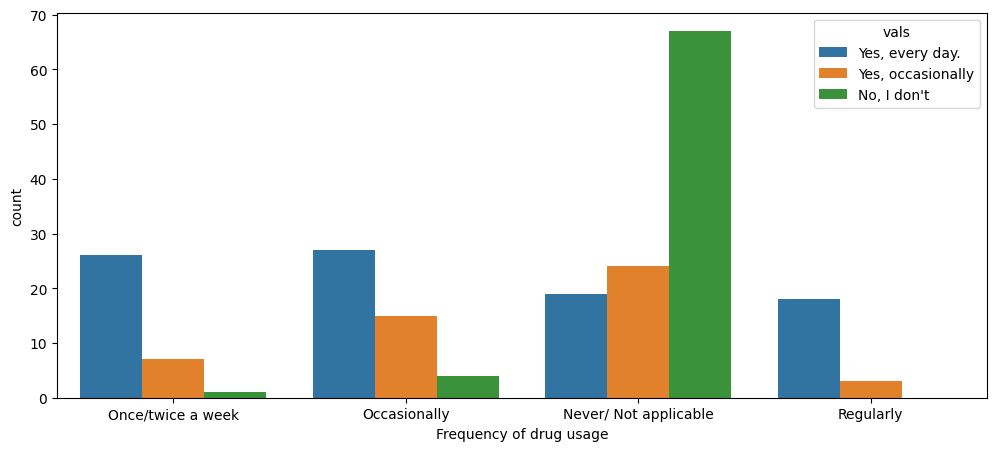

In [301]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Smoking'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

 Regular usage of drug in Male and Female are in to usage of multiple drugs

Male


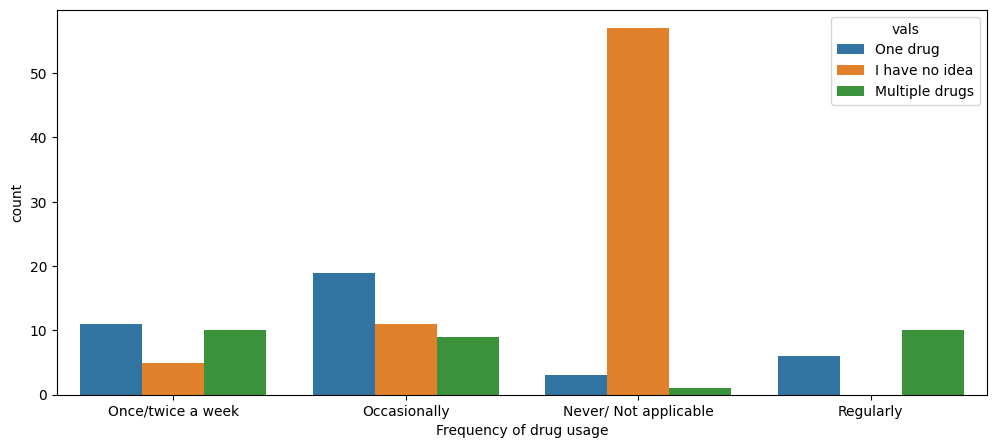

In [302]:
print("Male")
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Enjoyable with-'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])

Female


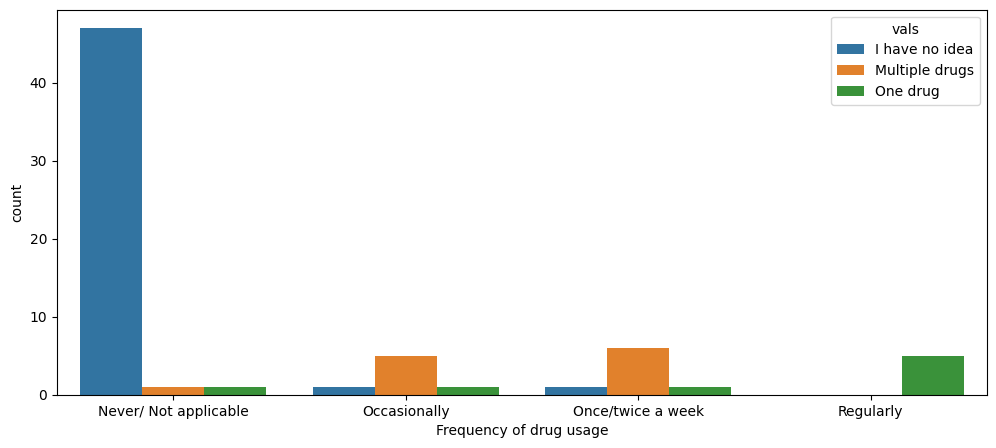

In [303]:
print("Female")
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])